# 0. Importing Required Libraries

In [87]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../Functions")
import custom_functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('ggplot')
## Change title size of a plot
mpl.rcParams['axes.titlesize'] = 22
# Figure size
mpl.rc("figure", figsize = (15,7))
## Change label size(x and y) of a plot
mpl.rcParams['axes.labelsize'] = 18
## Change xticks size of a plot
mpl.rcParams['xtick.labelsize'] = 16
## Change yticks size of a plot
mpl.rcParams['ytick.labelsize'] = 16

# 1. Getting Data

In [88]:
# Reading the excel file, sheet = Coles Transactions 
data = pd.read_excel("Simulated Coles Data.xlsx", sheet_name = "Coles Transactions")

# 2. Data Exploration

In [89]:
# Shape of the dataframe
data.shape

(58100, 53)

Data has 58,100 observations and 53 variables.

In [90]:
# Name of the columns
data.columns

Index(['ReceiptID', 'Value', 'pmethod', 'sex', 'homeown', 'income', 'age',
       'PostCode', 'nchildren', 'fruit', 'freshmeat', 'dairy',
       'MozerallaCheese', 'cannedveg', 'cereal', 'frozenmeal', 'frozendessert',
       'PizzaBase', 'TomatoSauce', 'frozen fish', 'bread', 'milk', 'softdrink',
       'fruitjuice', 'confectionery', 'fish', 'vegetables', 'icecream',
       'energydrink', 'tea', 'coffee', 'laundryPowder', 'householCleaners',
       'corn chips', 'Frozen yogurt', 'Chocolate', 'Olive Oil', 'Baby Food',
       'Napies', 'banana', 'cat food', 'dog food', 'mince', 'sunflower Oil',
       'chicken', 'vitamins', 'deodorants', 'dishwashingliquid', 'onions',
       'lettuce', 'KitKat', 'TeaTowel', 'Scones'],
      dtype='object')

In [91]:
# Getting first 5 rows of the data
data.head()

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
0,600001,78.0,2,2,2,83167.0,72.0,2437,0.0,0,...,0,1,1,0,1,1,1,0,0,0
1,600002,120.0,3,2,1,15151.0,78.0,2187,3.0,0,...,1,0,0,1,0,0,1,0,0,0
2,600003,198.0,3,1,1,21367.0,42.0,2378,0.0,1,...,1,1,0,0,0,1,1,0,0,0
3,600004,190.0,2,1,1,56528.0,59.0,2453,3.0,0,...,1,1,0,0,1,0,1,0,0,0
4,600005,173.0,3,1,1,43373.0,39.0,2146,2.0,0,...,0,1,0,0,1,0,0,0,0,0


In [92]:
# Getting summary of all the columns
data.describe()

,ReceiptID,Value,pmethod,sex,homeown,income,age,nchildren,freshmeat,dairy,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
count,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58099.000000,58099.000000,58098.000000,58100.000000,58100.000000,...,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58100.000000,58100.00000,58100.000000,58100.000000,58100.000000
mean,629050.500017,77.286134,2.496162,1.598055,1.389501,74838.192084,39.716626,1.348549,0.186145,0.231050,...,0.271394,0.650929,0.201824,0.251601,0.351411,0.221893,0.74315,0.016403,0.037108,0.046024
std,16772.169250,57.538666,2.520534,0.490295,2.489640,23952.338326,11.612701,2.758248,0.389227,0.421508,...,0.444683,0.476680,0.401365,0.433937,0.477415,0.415523,0.43690,0.127020,0.189029,0.209539
min,600001.000000,0.929691,1.000000,1.000000,1.000000,6000.230000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,614525.750000,29.530734,2.000000,1.000000,1.000000,65582.790269,33.751207,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,629050.500000,63.581908,2.000000,2.000000,1.000000,70168.878667,37.779257,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,643575.250000,116.000000,3.000000,2.000000,2.000000,75371.207579,42.217415,2.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,658100.000000,1967.696760,101.000000,2.000000,102.000000,650235.250000,95.000000,105.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [93]:
# Information about the dataframe
# null_counts = true, will not count rows which have missing values in it.
data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58100 entries, 0 to 58099
Data columns (total 53 columns):
ReceiptID            58100 non-null int64
Value                58100 non-null float64
pmethod              58100 non-null int64
sex                  58100 non-null int64
homeown              58100 non-null int64
income               58099 non-null float64
age                  58099 non-null float64
PostCode             48308 non-null object
nchildren            58098 non-null float64
fruit                58100 non-null object
freshmeat            58100 non-null int64
dairy                58100 non-null int64
MozerallaCheese      58100 non-null int64
cannedveg            58099 non-null float64
cereal               58091 non-null float64
frozenmeal           58100 non-null int64
frozendessert        58100 non-null int64
PizzaBase            58099 non-null float64
TomatoSauce          58100 non-null int64
frozen fish          58100 non-null int64
bread                58100 non-null

The columns having count less than 58,100 means those columns have missing values in them. Most of the columns are of type integer and float.

In [94]:
# Getting number of missing values in each column
data.isna().sum()

ReceiptID               0
Value                   0
pmethod                 0
sex                     0
homeown                 0
income                  1
age                     1
PostCode             9792
nchildren               2
fruit                   0
freshmeat               0
dairy                   0
MozerallaCheese         0
cannedveg               1
cereal                  9
frozenmeal              0
frozendessert           0
PizzaBase               1
TomatoSauce             0
frozen fish             0
bread                   0
milk                    1
softdrink               0
fruitjuice              0
confectionery           1
fish                    0
vegetables              0
icecream                0
energydrink             0
tea                     0
coffee                  0
laundryPowder           0
householCleaners        0
corn chips              0
Frozen yogurt           0
Chocolate               0
Olive Oil               0
Baby Food               0
Napies      

Most of the missing values are in column PostCode which is 9792 and second highest number of missing values is in cereal column which is 9. 

In [95]:
print("Total number of missing values is :",data.isna().sum().sum())

Total number of missing values is : 9809


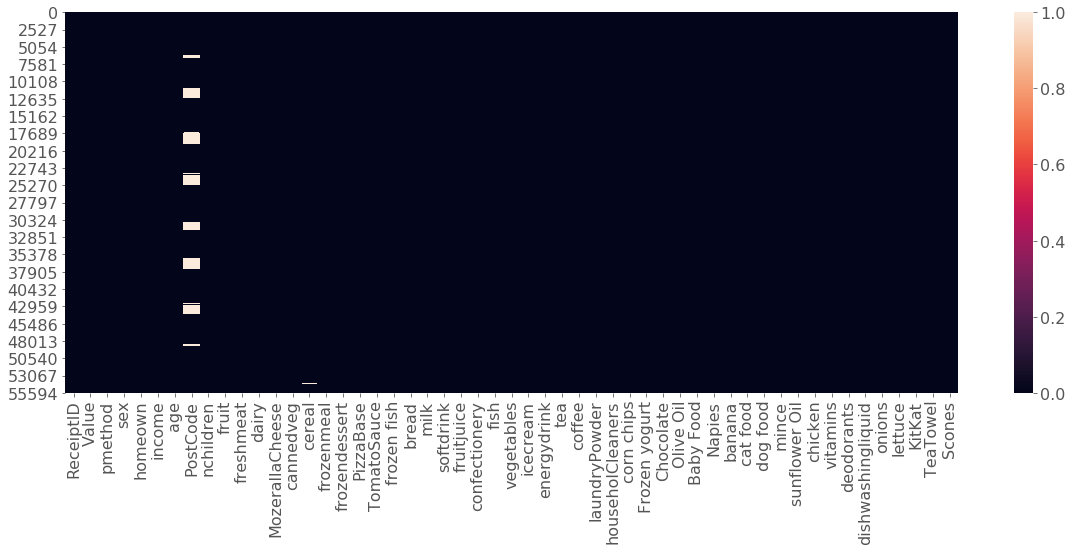

In [96]:
# Plotting the missing values
plt.figure(figsize = (20,7))
sns.heatmap(data.isna())
plt.show()

This graph above confirms the statement we just made before about the missing values distribution.

# 3. Data Preprocessing and Cleaning

### Receipt ID
#### Shows receipt id of the transaction. Each transaction should have unique receipt id.

In [97]:
len(data.ReceiptID)

58100

In [98]:
# Getting length of unique ReceiptID
len(set(data.ReceiptID))

58091

9 duplicate entries in Receipt ID.

In [107]:
data[data.duplicated("ReceiptID", keep = False)].sort_values("ReceiptID")

,ReceiptID,Value,pmethod,sex,homeown,income,age,PostCode,nchildren,fruit,...,sunflower Oil,chicken,vitamins,deodorants,dishwashingliquid,onions,lettuce,KitKat,TeaTowel,Scones
79,600090,142.000000,3,2,1,50226.000000,81.000000,2250,2.0,1,...,0,1,0,0,0,0,1,0,0,0
89,600090,96.000000,2,2,1,95560.000000,12.000000,2422,3.0,1,...,1,1,1,0,0,1,1,0,0,0
82,600093,45.000000,2,2,1,17984.000000,30.000000,2445,1.0,1,...,0,1,1,0,1,0,1,0,0,1
92,600093,152.000000,3,1,2,117353.000000,55.000000,2460,3.0,1,...,1,0,0,0,1,1,1,0,0,0
87,600099,154.000000,2,2,3,80687.000000,47.000000,2111,0.0,0,...,0,1,0,0,1,0,1,0,0,0
98,600099,17.000000,2,2,1,64145.000000,42.000000,2285,0.0,0,...,1,1,0,0,1,0,1,0,1,0
12294,612295,16.000000,4,1,2,67443.834744,38.810297,NaN,3.0,1,...,1,1,0,1,1,0,1,0,0,1
12296,612295,28.740141,2,2,1,79696.212416,39.079175,NaN,2.0,0,...,0,1,0,0,0,0,1,0,1,0
12306,612305,14.506269,4,2,1,72757.193087,31.349241,NaN,3.0,0,...,0,0,1,0,0,1,0,0,0,0
12304,612305,22.287095,2,2,1,72118.969656,28.102349,NaN,1.0,1,...,0,1,0,0,1,0,1,0,0,0


Here only ReceiptID has duplicate values not other columns. We won't be needing ReceiptID for our analysis, so we are not dealing with this issue.

### Value
#### Shows the value of the transaction in dollars.

In [99]:
# Summary of the value column
data.Value.describe()

count    58100.000000
mean        77.286134
std         57.538666
min          0.929691
25%         29.530734
50%         63.581908
75%        116.000000
max       1967.696760
Name: Value, dtype: float64

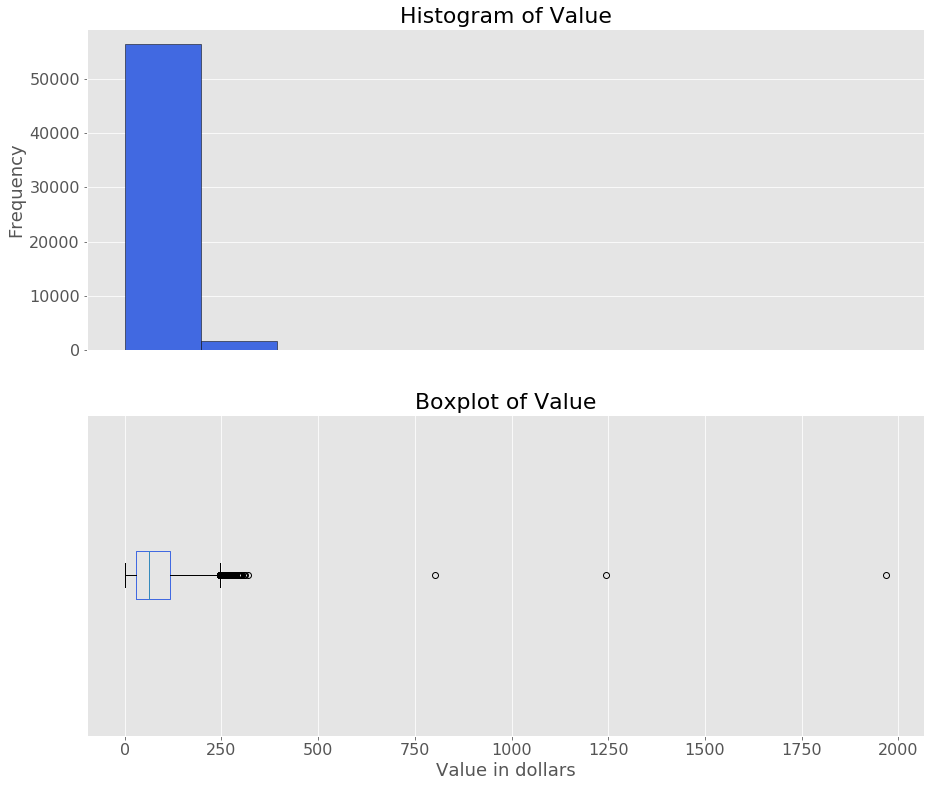

In [100]:
%autoreload 2
custom_functions.create_histogram_plus_boxplot(data.Value, "Value", color = "royalblue", ylabel = "Frequency", 
                                               xlabel = "Value in dollars" , size = (15,13))

Histogram is right skewed. Most of the values are in between 0 - 250. By looking at the boxplot we can say that there are many outliers, but only 3 of them are extreme which are \\$802.0592, \\$1242.9862, \\$1967.6968. These observations could be explained by saying that they could be order for a big party or an occasion. These values might cause problems when we will be doing clustering, so I will be changing them to the mean value of the column Value excluding extreme outliers. Since we are changing only 3 observation it won't be affecting results of future analysis. 

### Pmethod
#### Shows the payment method used for the transaction.

In [108]:
data.pmethod.describe()

count    58100.000000
mean         2.496162
std          2.520534
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max        101.000000
Name: pmethod, dtype: float64

In [ ]:
# Changing the type of the Pmethod